# Problem 1 

In [1]:
# Import needed libraries
import matplotlib.pyplot as plt
import statistics as st
import random as rd
import numpy as np
import numpy.random as npr

In [2]:
# Values for simulation
homes = 100 # Homes in a neighborhood
athome_rate = 0.8 # Probability someone is home
purchase_rate = 0.3 # Probability someone will purchase

sales_mean = 25 # mean sales amount
sales_std = 5 # standard deviation sales amount

# Number of trials
trials = 1000

In [3]:
# Simulation Function for door-to-door marketing campaign

# Inputs are the number of homes in a neighborhood and 
# the number of simulation trials

# Returns the array of projected total sales 

def door_to_door_sim(homes,trials):
    # Intialize empty list
    sample = []
    # Loop over trails
    for i in range(trials):
        
        # Number of people that are home in neighborhood
        number_answer = npr.binomial(homes,athome_rate)
        
        # Number of people who are home and will make a purchase
        number_buy = npr.binomial(number_answer,purchase_rate)
        
        # Start out with 0 in sales and loop over the number of people who are home and will make a purchase
        tot_sales = 0
        for j in range(number_buy):
            
            # sales amount is normally distributed
            sale = rd.normalvariate(sales_mean,sales_std)
            
            # Add to total sales
            tot_sales = tot_sales + sale
        sample.append(tot_sales)
    return(sample)
        

In [4]:
# Run the function
sample = door_to_door_sim(homes,trials)

(array([ 10.,  33., 136., 267., 264., 190.,  72.,  22.,   3.,   3.]),
 array([ 269.30301599,  346.12176483,  422.94051368,  499.75926252,
         576.57801137,  653.39676021,  730.21550906,  807.0342579 ,
         883.85300675,  960.6717556 , 1037.49050444]),
 <BarContainer object of 10 artists>)

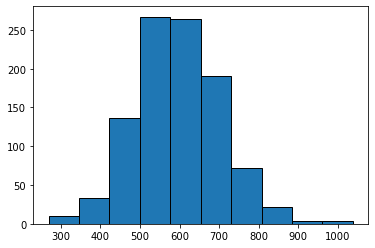

In [5]:
# Look at distribution
plt.hist(sample, edgecolor='k')

In [8]:
print('The expected revenue is = %5.2f' % st.mean(sample))

The expected revenue is = 601.31


In [9]:
# Compute the 95% confidence interval
sample_mean = st.mean(sample)
sample_std = st.stdev(sample)
moe = 1.96 * sample_std / len(sample) ** 0.5
lcl = sample_mean - moe
ucl = sample_mean + moe
print('The 95%% confidence interval for the mean of the total sales is (%6.2f, %6.2f)' % (lcl,ucl))

The 95% confidence interval for the mean of the total sales is (594.73, 607.90)


In [10]:
# Probibility that the nonprofit will collect more than $800
more_than = 800
proportion = sum(1 for x in sample if x >= more_than) / len(sample)
print('There is a %5.2f%% chance of selling more than $800.' % (100*proportion))

There is a  2.90% chance of selling more than $800.


In [11]:
# 90% confidence interval for the proportion
moe = 1.645 * (proportion * (1 - proportion) / len(sample)) ** 0.5
lcl = proportion - moe
if lcl < 0.0: lcl = 0.0
ucl = proportion + moe
print('The 90%% confidence interval for the probability of total sales more than $800 is (%6.4f, %6.4f).' % (lcl,ucl))

The 90% confidence interval for the probability of total sales more than $800 is (0.0203, 0.0377).


# Problem 2

In [14]:
# Values for simulation
rooms = 50 # Number of hotel rooms
cost_per_night = 105 # Cost per night
clean_cost = 45 # Cost to clean room
chance_no_show = .1 # Probability customer no-show
overbook_cost = 150 # Cost to hotel if overbooked
reservation_limit = 56 # Max number of bookings

# Trials for simulation
trials = 10000

In [15]:
# Simulation Function for hotel bookings when the hotel is at it's max booking (reservation_limit)

# Inputs are the max number of max number of bookings and 
# the number of simulation trials

# Returns the array of projected total sales 

def hotel_sim(trials,reservation_limit):
    # Empty list
    sample = []
    
    # Loop over trials
    for i in range(trials):
        
        # Number of no shows at hotel
        number_no_show = npr.binomial(reservation_limit,chance_no_show)

        # Number who actually show up
        number_customers = reservation_limit - number_no_show

        # Check if rooms are overbooked
        if number_customers > rooms:
            # If overbooked, hotel is full
            number_overbook = number_customers - rooms
            rooms_taken = rooms
        else:
            # If not overbooked, hotel can support all guests
            number_overbook = 0
            rooms_taken = number_customers
            
        # Profit of current model 
        profit = rooms_taken * (cost_per_night - clean_cost) + number_no_show * cost_per_night - number_overbook * overbook_cost
        sample.append(profit)
    return(sample)
    

In [16]:
# Run simulation
sample = hotel_sim(trials,reservation_limit)

(array([  32.,  190.,  509.,  997.,    0., 1513., 1815., 3003., 1859.,
          82.]),
 array([2100., 2298., 2496., 2694., 2892., 3090., 3288., 3486., 3684.,
        3882., 4080.]),
 <BarContainer object of 10 artists>)

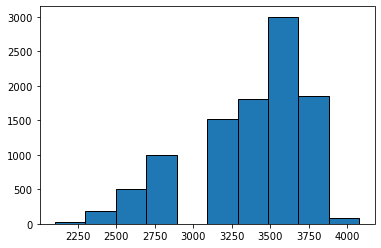

In [18]:
# Look at distribution
plt.hist(sample, edgecolor='k')

In [19]:
# Mean total profit
print('The expected profit is = %5.2f' % st.mean(sample))

The expected profit is = 3381.31


In [20]:
# 90% confidence interval of mean profit
sample_mean = st.mean(sample)
sample_std = st.stdev(sample)
moe = 1.645 * sample_std / len(sample) ** 0.5
lcl = sample_mean - moe
ucl = sample_mean + moe
print('The 90%% confidence interval for the mean of the total profit is (%6.2f, %6.2f)' % (lcl,ucl))

The 90% confidence interval for the mean of the total profit is (3375.08, 3387.54)


In [21]:
#  probability of making a profit of at least $3,800 on a single night
more_than = 3800
proportion = sum(1 for x in sample if x >= more_than) / len(sample)
print('There is a %5.2f%% chance of selling more than $3800.' % (100*proportion))

There is a  5.14% chance of selling more than $3800.


In [29]:
# 95% confidence interval for your estimate of this probability
moe = 1.96 * (proportion * (1 - proportion) / len(sample)) ** 0.5
lcl = proportion - moe
if lcl < 0.0: lcl = 0.0
ucl = proportion + moe
print('The 95%% confidence interval for the probability of total sales more than $3800 is (%6.4f, %6.4f).' % (lcl,ucl))

The 95% confidence interval for the probability of total sales more than $3800 is (0.0471, 0.0557).


In [30]:
# Finding the optimal overbooking level
min_overbook = 50
max_overbook = 65

range_overbook = range(min_overbook,max_overbook + 1)

In [31]:
profit = []
for j in range_overbook:
    sample = hotel_sim(trials,j)
    profit.append(st.mean(sample))
    

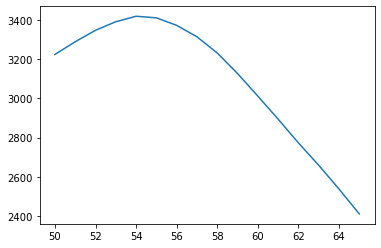

In [32]:
plt.plot(range_overbook,profit)

In [33]:
overbook = range_overbook[profit.index(max(profit))]

In [34]:
print("The optimal overbooking level is {}".format(overbook))

The optimal overbooking level is 54
